In [43]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import scipy 
import statsmodels
import os

from scipy import stats
from scipy.stats import levene
from scipy.stats import shapiro
from scipy.stats import bartlett
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

In [78]:
### Настроим параметры графиков 

sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,10)}
        )

### Проверим, какой формат фотографий блюд является наилучшим, т.е. в какой из групп в среднем покупали больше всего. Всего пользователям показывались три варианта:

#### A – прямоугольные 16:9
#### B – квадратные
#### C – прямоугольные 12:4

In [2]:
## В данной работе проведем межфакторый дисперсионный анализ 

In [3]:
df = pd.read_csv('5_task_1.csv')

In [4]:
df.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


In [5]:
df.shape


(30000, 3)

In [6]:
df.isna().sum()

id        0
group     0
events    0
dtype: int64

In [7]:
df.nunique()

id        30000
group         3
events       81
dtype: int64

In [8]:
df['group'].value_counts()

C    10000
A    10000
B    10000
Name: group, dtype: int64

In [9]:
group_A = df[df['group'] == 'A']['events']
group_B = df[df['group'] == 'B']['events']
group_C = df[df['group'] == 'C']['events']

In [10]:
# Проведем тест Левена для проверки гомогенности дисперсий
# А так же тест Бартлетта

In [11]:

levene(group_A, group_B, group_C)

# p-value  > 0.05 , следовательно, отклоняем альтернативную гипотезу 
# Дисперсии примерно равные 

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

In [12]:
# Проведем тест Шапиро-Уилка для проверки нормальности распределений, 
# так как дисперсионный анализ можно применять только на нормальных распределениях

In [13]:
group_A_test = group_A.sample(1000, random_state=17)
group_B_test = group_B.sample(1000, random_state=17)
group_C_test = group_C.sample(1000, random_state=17)

In [14]:
bartlett(group_A_test, group_B_test, group_C_test)

BartlettResult(statistic=0.07579461153942346, pvalue=0.9628118110322625)

In [15]:
# p-value = 0.96, слоедовательно, дисперсии выборок примерно одинаковые 

In [16]:
# Тест Шапиро для проверки нормальности 

In [17]:
shapiro(group_A_test), shapiro(group_B_test), shapiro(group_C_test)

(ShapiroResult(statistic=0.9973153471946716, pvalue=0.09609563648700714),
 ShapiroResult(statistic=0.9980798363685608, pvalue=0.31768906116485596),
 ShapiroResult(statistic=0.9981185793876648, pvalue=0.3359004259109497))

In [18]:
#### Так как количество гипотез ( групп для сравнения) больше 2, то воспользуемся однофакторным дисперсионным анализом. 
# Его можно использовать при соблюдении 2 условий: 
# 1) Дисперсии выборок гомогенны  2) Объем выборок больше 30, если меньше 30, то необходимо проверить на нормальность выборки 

In [19]:
from scipy import stats

stats.f_oneway(group_A_test, group_B_test, group_C_test) 

F_onewayResult(statistic=293.70244548162333, pvalue=3.3198466072089916e-117)

In [20]:
# p-value сильно меньше 0.05, следовательно, отклоняем нулевую гипотезу

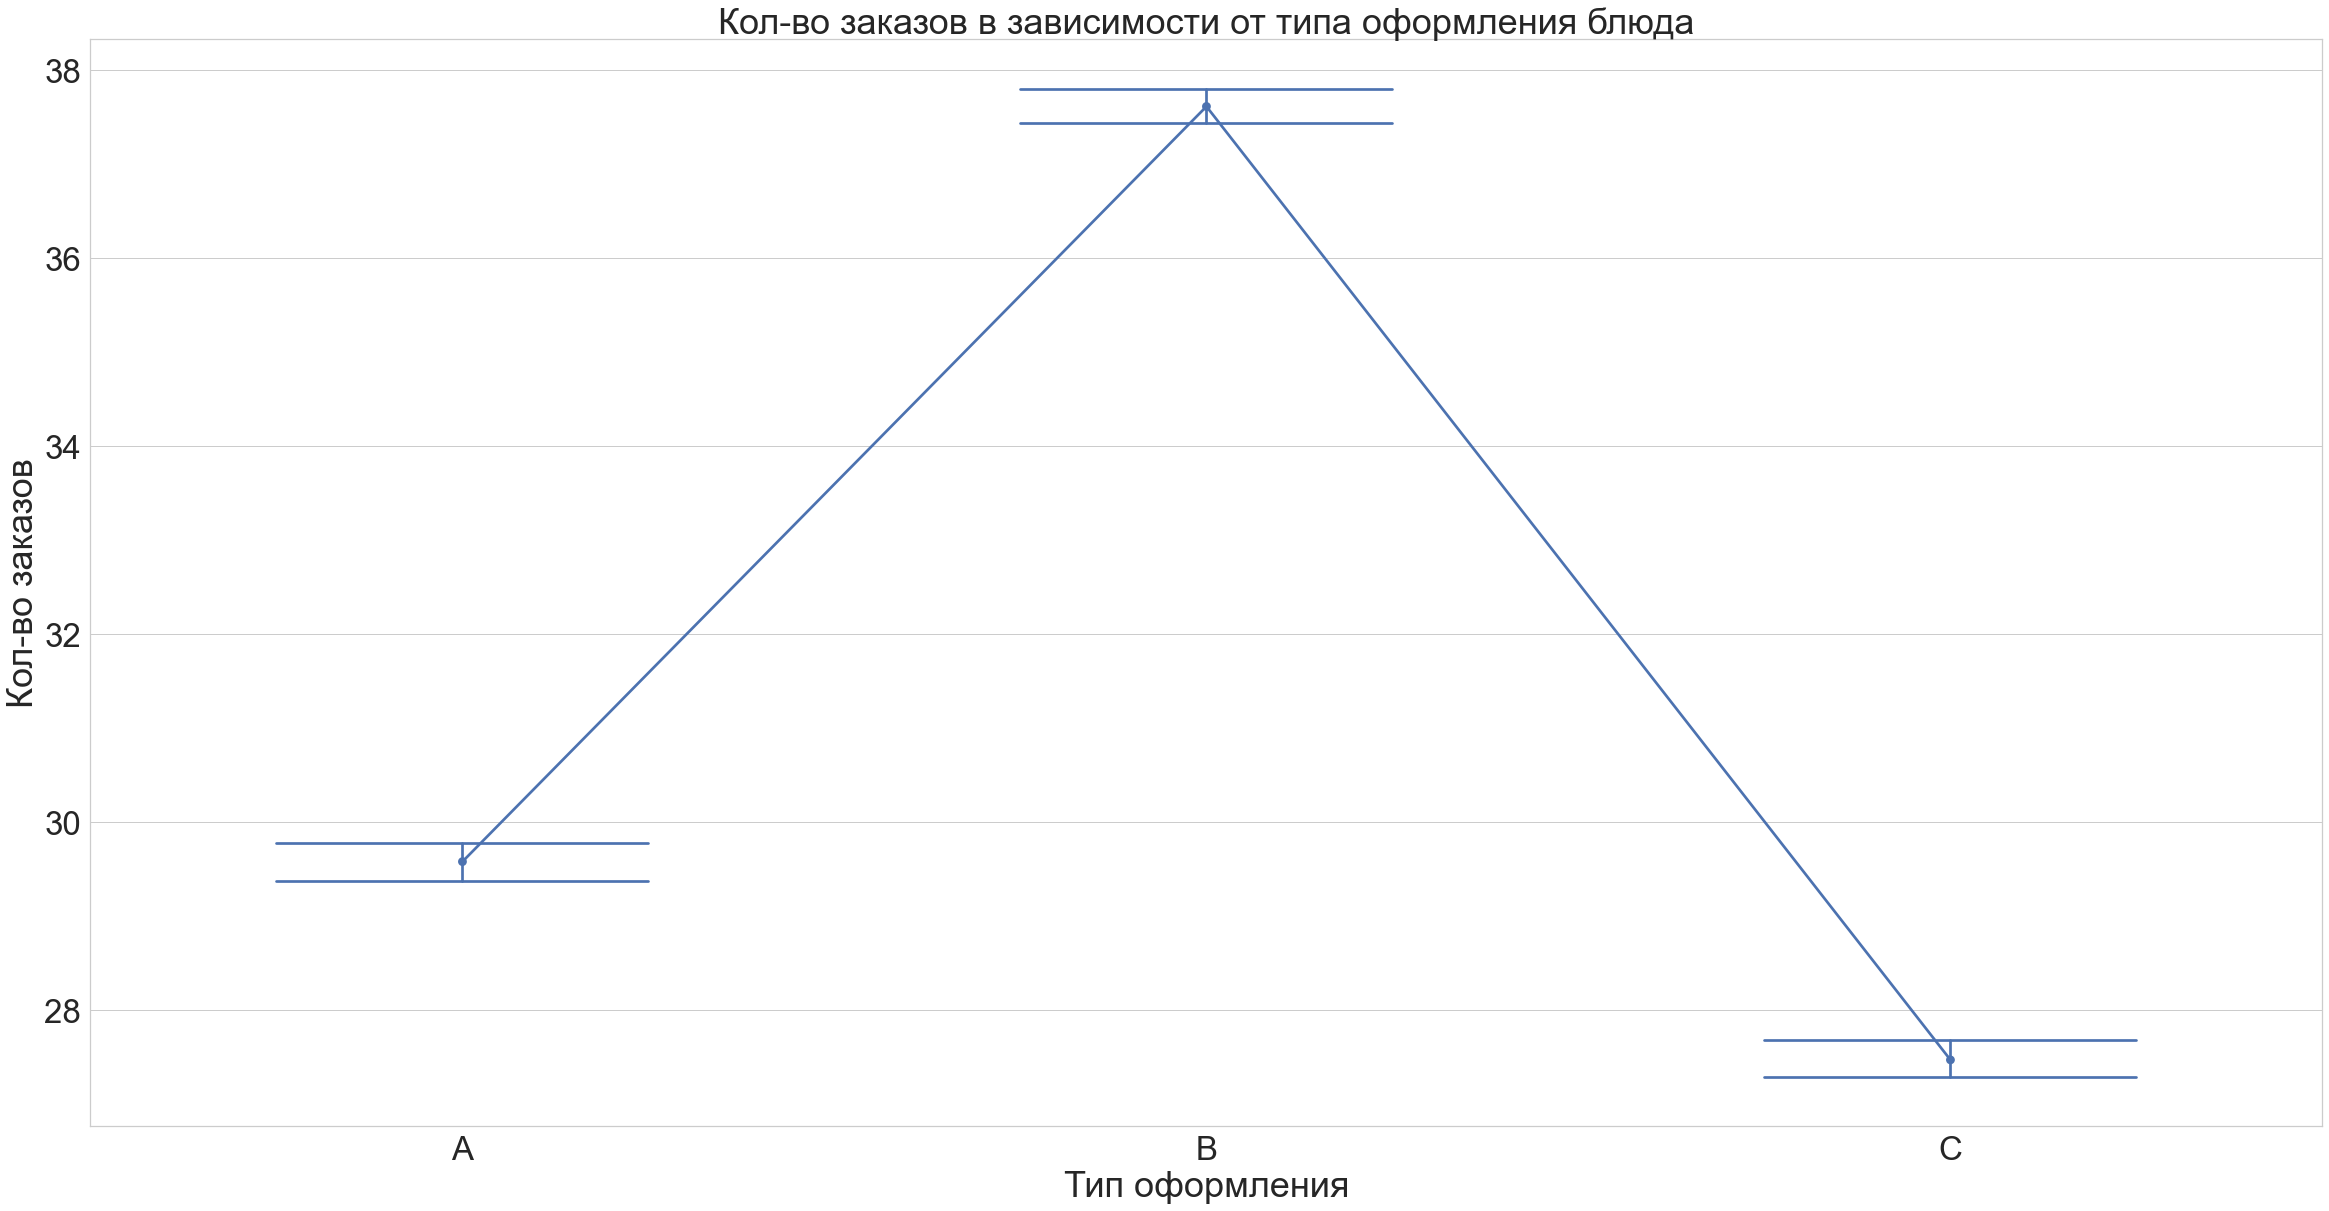

In [74]:
sns.pointplot(x = 'group', y = 'events', data = df, capsize = .5)
plt.title('Кол-во заказов в зависимости от типа оформления блюда')
plt.xlabel('Тип оформления')
plt.ylabel('Кол-во заказов')
None

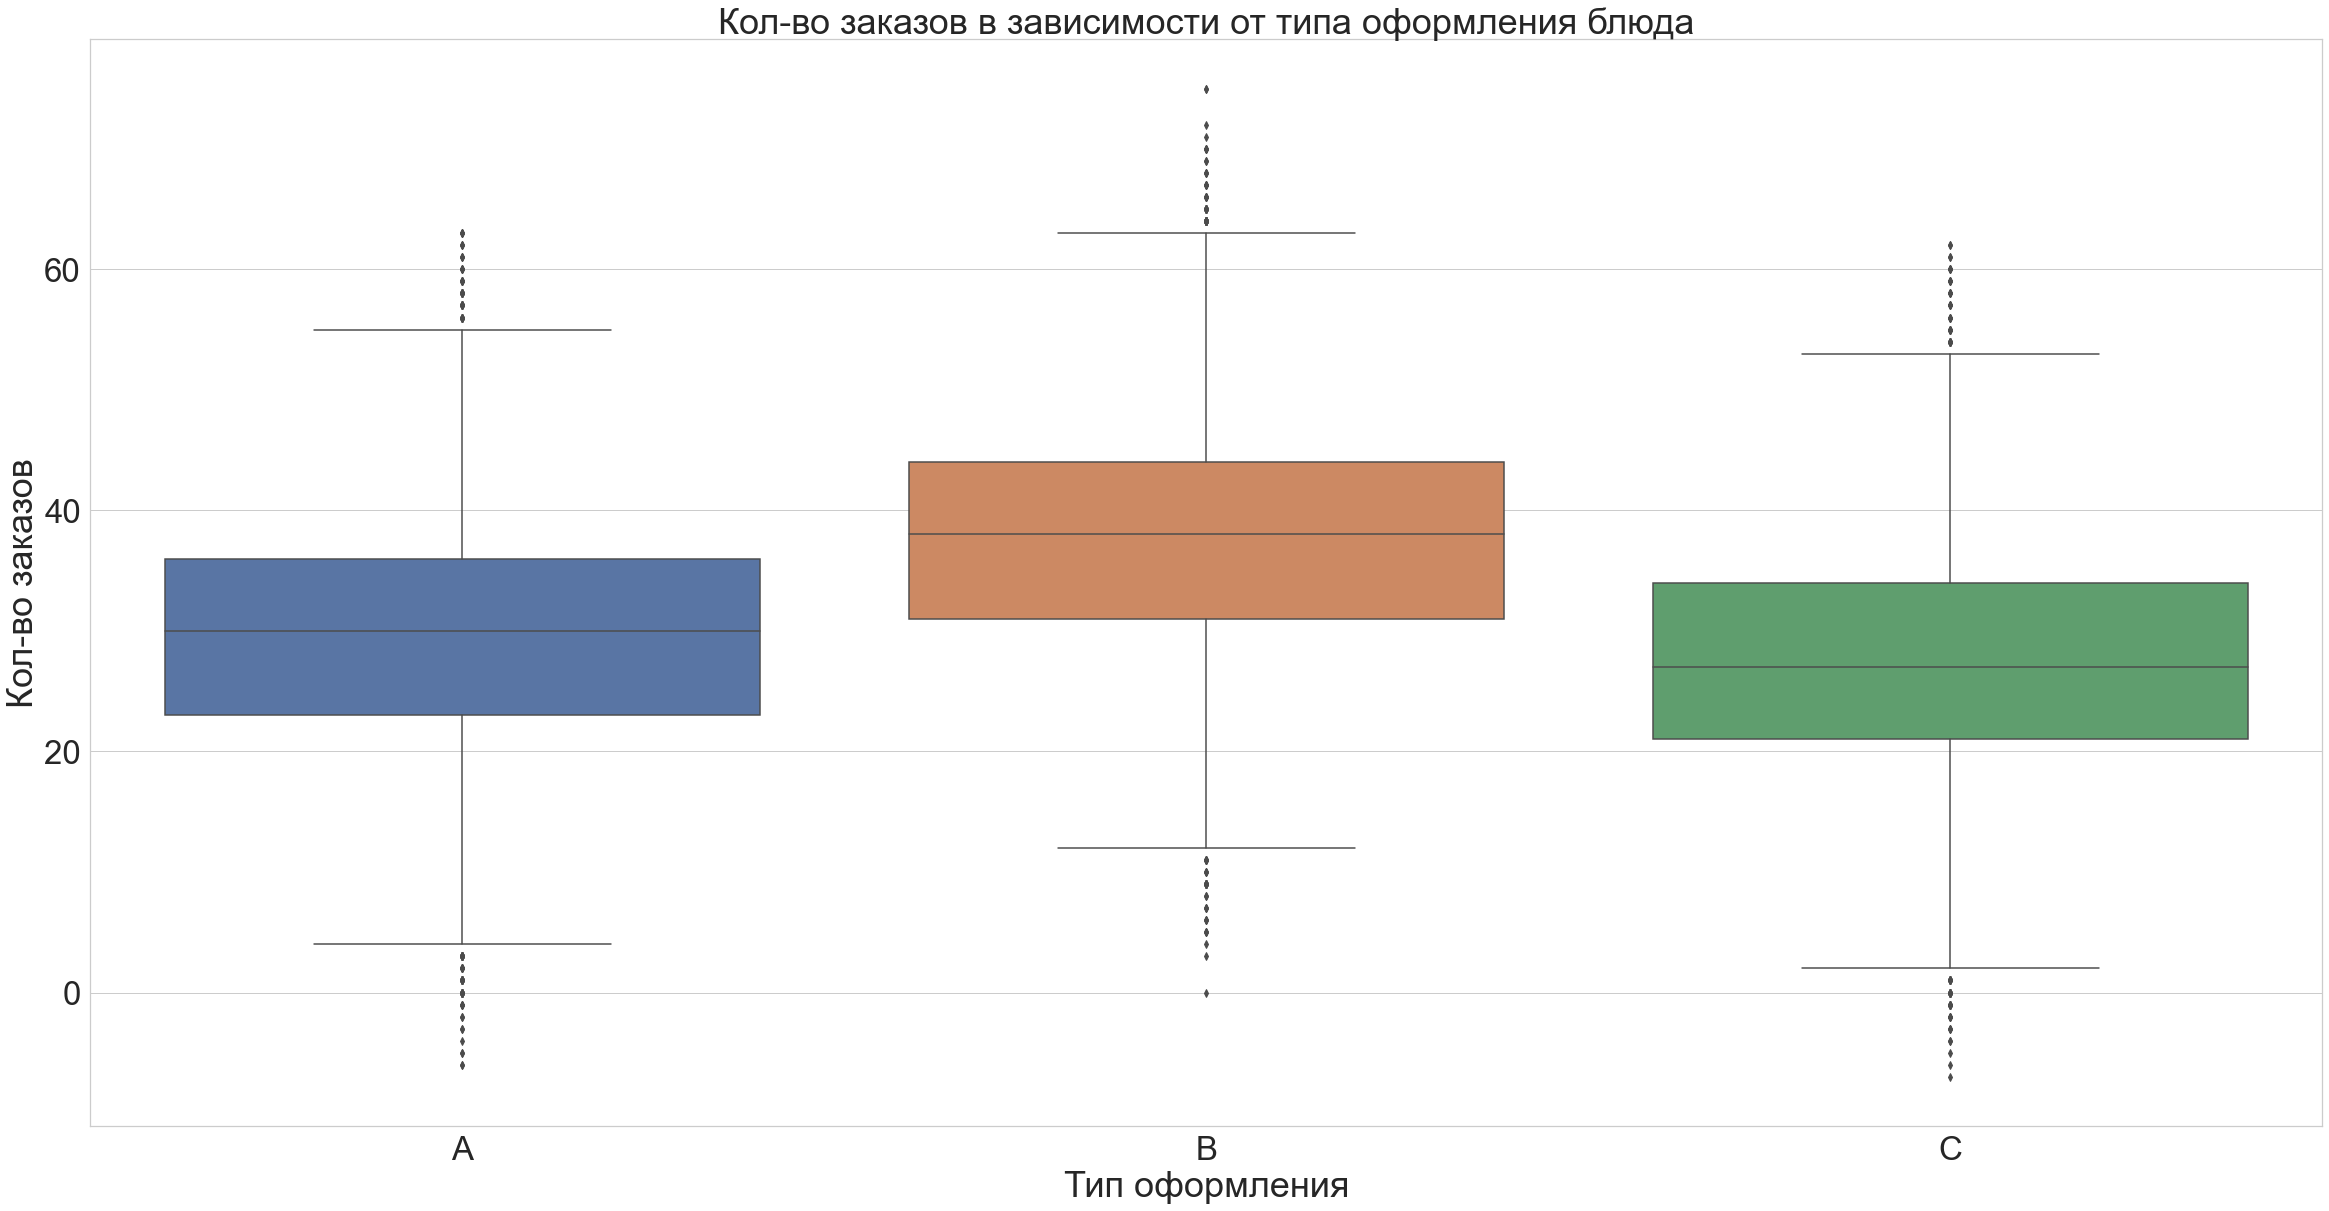

In [75]:
sns.boxplot(x = 'group', y = 'events', data = df)
plt.title('Кол-во заказов в зависимости от типа оформления блюда')
plt.xlabel('Тип оформления')
plt.ylabel('Кол-во заказов')
None

In [32]:
# Согласно графикам, а так же однофакторному дисперсионному анализу, можно сделать вывод,
# что статистически значимые различия есть у пар группы A/B, B/C. Проверим эту гипотезу. Можем воспользоватьяс t-test или воспользоваться критерием Тьюки

In [33]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

print(pairwise_tukeyhsd(df['events'], df['group']))


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    8.034 0.001   7.7038  8.3642   True
     A      C  -2.1093 0.001  -2.4395 -1.7791   True
     B      C -10.1433 0.001 -10.4735 -9.8131   True
----------------------------------------------------


In [41]:
# Критерий Тьюки показал, что во всех трех группах есть статистически значимые различия. Выберим ту группу,
# у которой среднее число заказов является наибольшим 

In [40]:
group_A.mean() , group_B.mean(), group_C.mean()


(29.5796, 37.6136, 27.4703)

### Лучшим оформления является прямоугольным ( тип B)

### Часть 2. Проверим, как пользователи отреагируют на изменение формата кнопки оформления заказа, с разбивкой по сегменту клиента

In [44]:
os.listdir()

['.ipynb_checkpoints',
 '5_task_1.csv',
 '5_task_2.csv',
 'ads_data.csv',
 'conversion.csv',
 'experiment_lesson_4.csv',
 'games.csv',
 'london.csv',
 'pet_project_1.ipynb',
 'Pet_project_2.ipynb',
 'pet_project_3.ipynb',
 'pet_project_4.ipynb',
 'pet_project_5.ipynb',
 'Pet_project_6.ipynb',
 'Pet_project_8.ipynb',
 'Some_training.ipynb',
 'Untitled.ipynb',
 'Untitled1.ipynb']

In [45]:
second_df = pd.read_csv('5_task_2.csv')

In [48]:
second_df['group'].unique()


array(['test', 'control'], dtype=object)

In [50]:
second_df['segment'].unique()

array(['high', 'low'], dtype=object)

In [55]:
###  В данном исследовании воспользуемся многофакторным дисперсионным анализом, так как на среднее кол-во заказов влияют 2 фактора:
### группа (тестовая, контрольная) и сегмент (high, low )

In [57]:
### Проведем первичный визуальный анализ групп 

In [61]:
test_df = second_df[second_df['group'] == 'test']

In [62]:
control_df = second_df[second_df['group'] == 'control']

In [64]:
test_df

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0
...,...,...,...,...
59995,92868,test,low,35.0
59996,63488,test,low,31.0
59997,3425,test,low,32.0
59998,53067,test,low,18.0


C:\Users\IVAN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


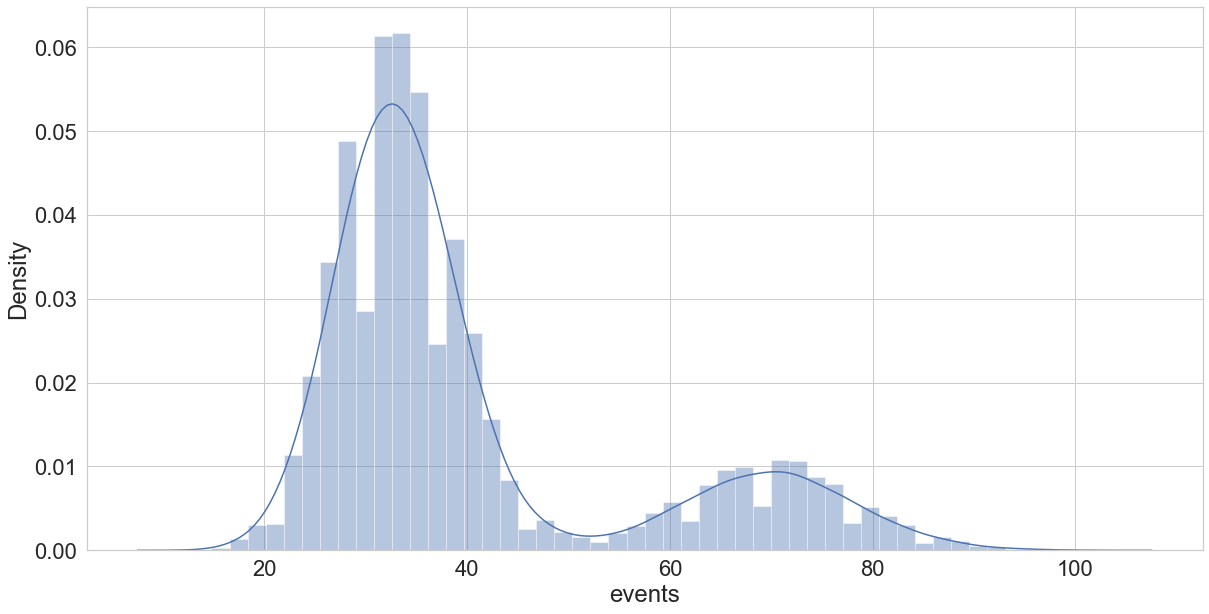

In [83]:
sns.distplot(test_df['events'], label='Тестовая выборка')
None

C:\Users\IVAN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


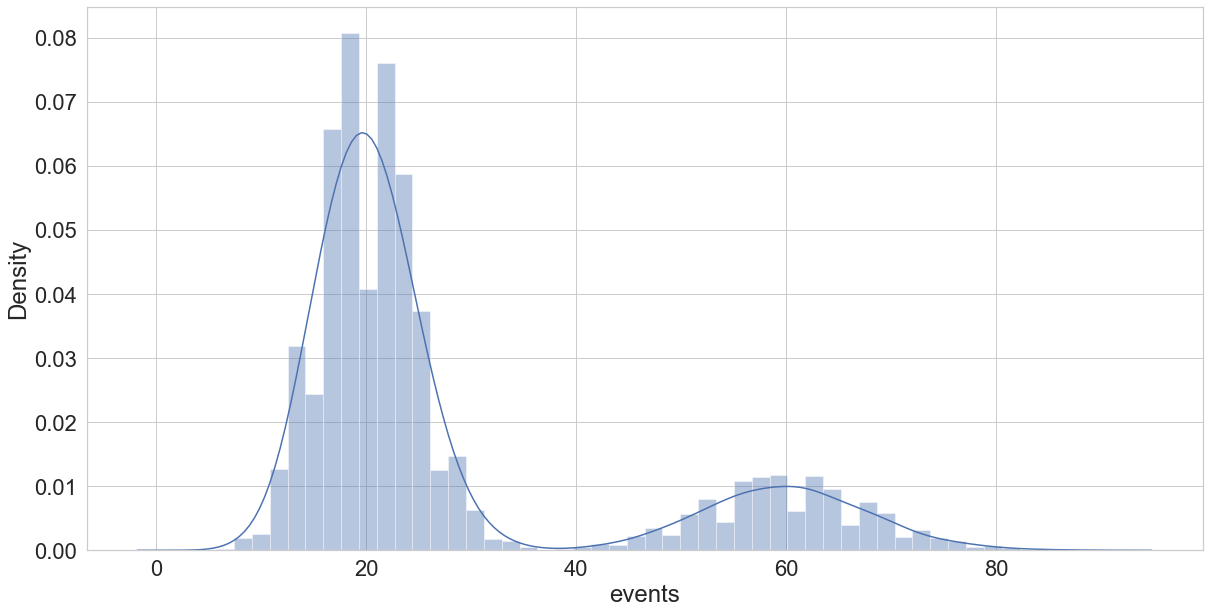

In [85]:
sns.distplot(control_df['events'], label='Контрольная выборка')
None

In [86]:
### Посчитаем  среднее, медиану и стандартное отклонение events в разбивке по группе и по сегменту пользователя. 

In [94]:
parametres_control = control_df.groupby('segment', as_index=False)\
.agg({'events' : ['mean', 'median', 'std']})
parametres_control

segment     events                 
                mean median       std
0    high  59.970800   60.0  7.805347
1     low  20.031575   20.0  4.473576

In [95]:
parametres_test = test_df.groupby('segment', as_index=False)\
.agg({'events' : ['mean', 'median', 'std']})
parametres_test

segment     events                 
                mean median       std
0    high  69.938500   70.0  8.403974
1     low  33.025925   33.0  5.720845

In [97]:
### Проведем межфакторный дисперсионный анализ по формуле: events ~ segment + group + segment:group

In [ ]:
### Проведем тест Левена для сравнения дисперсий 


In [100]:
levene(control_df['events'], test_df['events'])
## p-value  > 0.05 , следовательно, отклоняем альтернативную гипотезу 
# Дисперсии примерно равные 

LeveneResult(statistic=2.5440050816535327, pvalue=0.11071679229795423)

In [101]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


In [102]:

formula = 'events ~ segment + group + segment:group'
model = ols(formula, second_df).fit()
aov_table = anova_lm(model, typ=2)

In [104]:
aov_table
# sum_sq - сумма квадратов
# df - степени свободы
# F - F-значение
# PR (>F) - p-значение

,sum_sq,df,F,PR(>F)
segment,2.362480e+07,1.0,689756.377485,0.000000e+00
group,3.837195e+06,1.0,112031.864119,0.000000e+00
segment:group,3.664244e+04,1.0,1069.823273,2.060261e-233
Residual,3.424956e+06,99996.0,NaN,NaN


In [122]:
second_df

,id,group,segment,events,combination
0,83440,test,high,78.0,test \ high
1,96723,test,high,71.0,test \ high
2,68719,test,high,80.0,test \ high
3,50399,test,high,80.0,test \ high
4,95613,test,high,78.0,test \ high
...,...,...,...,...,...
99995,60695,control,low,15.0,control \ low
99996,5934,control,low,16.0,control \ low
99997,30046,control,low,22.0,control \ low
99998,26474,control,low,21.0,control \ low


In [105]:
# Исходя из результатов межфакторного теста, можно сделать вывод, что
# значим как эффект обоих факторов, так и их взаимодействие.

In [118]:
print(pairwise_tukeyhsd(second_df['events'], second_df['combination']))


        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2    meandiff p-adj  lower    upper   reject
--------------------------------------------------------------------
control \ high control \ low -39.9392 0.001 -40.1073 -39.7711   True
control \ high   test \ high   9.9677 0.001   9.7551  10.1803   True
control \ high    test \ low -26.9449 0.001  -27.113 -26.7768   True
 control \ low   test \ high  49.9069 0.001  49.7388   50.075   True
 control \ low    test \ low  12.9944 0.001   12.888  13.1007   True
   test \ high    test \ low -36.9126 0.001 -37.0807 -36.7445   True
--------------------------------------------------------------------


In [113]:
second_df['combination'] = second_df['group'] + ' \ ' + second_df['segment']

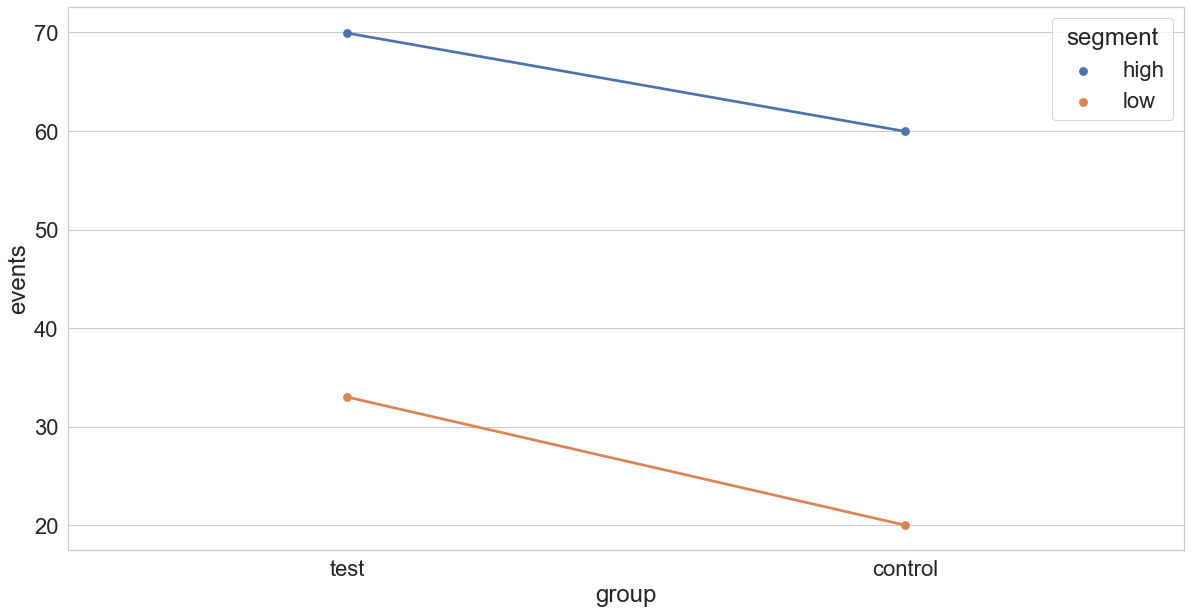

In [136]:
sns.pointplot(x='group', y='events', data=second_df, hue='segment')
None

<AxesSubplot:xlabel='combination', ylabel='events'>

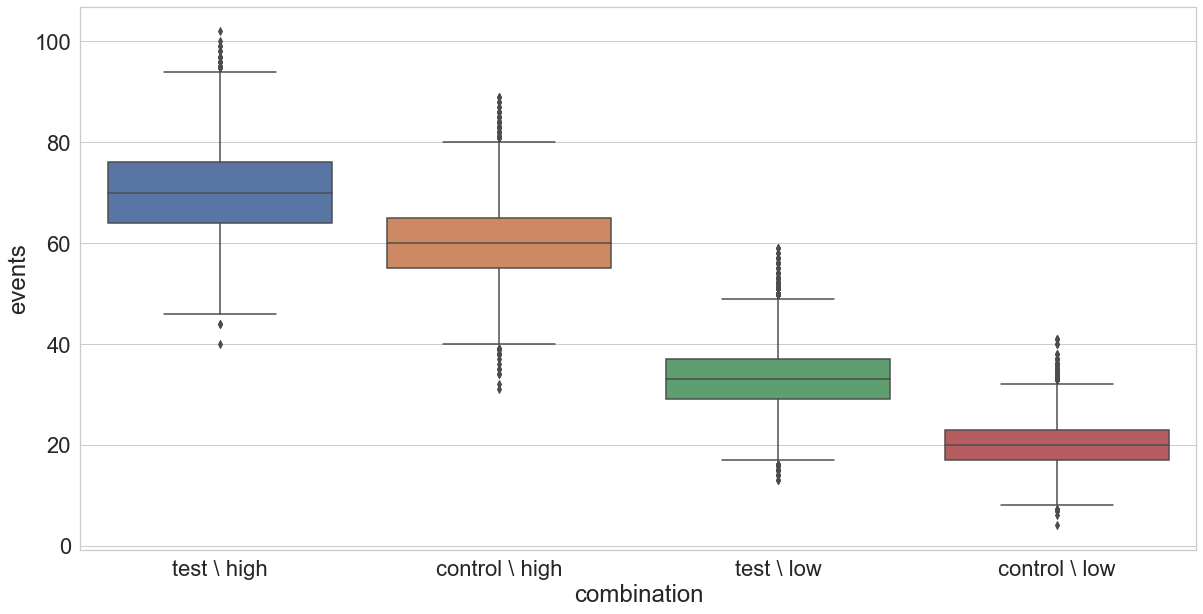

In [129]:
sns.boxplot(x='combination', y='events', data=second_df)